In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.api as sm
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con open")

con open


In [3]:
sql = "SELECT * FROM vam JOIN chiisat ON vam.school_id = chiisat.school_id WHERE vam.grade = %s AND vam.year = %s AND chiisat.grade = %s AND chiisat.year = %s ORDER BY vam.school_id;"

data = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['4th Grade','2013','4th Grade','2013'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

data[:3]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color,school_name,school_id,unit,network,grade,year,readme,mathme,compme,readexc,mathexc,compexc,readmeet,mathmeet,compmeet,readblw,mathblw,compblw,readwrn,mathwrn,compwrn,readtst,mathtst
0,GLOBAL CITIZENSHIP CHTR,400009,Charter/Contract,4th Grade,2013,47,-0.8,-1.7 to 0,17,Yellow,47,-1.1,-1.7 to -0.4,15,Red,GLOBAL CITIZENSHIP CHTR,400009,2025,Charter,4th Grade,2013,51.0,55.1,58.5,6.1,0.0,4.1,44.9,55.1,54.4,28.6,34.7,31.3,20.4,10.2,10.2,49,49
1,"LOCKE, A CHTR",400011,Charter/Contract,4th Grade,2013,59,-0.5,-1.3 to 0.3,28,Yellow,59,0.4,-0.2 to 1,68,Yellow,"LOCKE, A CHTR",400011,4730,Charter,4th Grade,2013,62.1,69.0,71.7,13.8,13.8,16.2,48.3,55.2,55.5,31.0,24.1,23.7,6.9,6.9,4.6,58,58
2,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Charter/Contract,4th Grade,2013,47,-0.2,-1.1 to 0.6,38,Yellow,47,-0.3,-1 to 0.4,40,Yellow,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,3990,Charter,4th Grade,2013,20.4,24.5,30.3,2.0,2.0,1.4,18.4,22.4,29.0,67.3,71.4,63.4,12.2,4.1,6.2,49,49


In [4]:
data.dtypes
#Check if sql request was successful - yes, number matches that found in excel
#data.info()

school_name                object
school_id                  object
network                    object
grade                      object
year                       object
reading_studentsnumber    float64
reading_vam               float64
reading_confidence         object
reading_percentile        float64
reading_color              object
math_studentsnumber       float64
math_vam                  float64
math_confidence            object
math_percentile           float64
math_color                 object
school_name                object
school_id                  object
unit                       object
network                    object
grade                      object
year                       object
readme                    float64
mathme                    float64
compme                    float64
readexc                   float64
mathexc                   float64
compexc                   float64
readmeet                  float64
mathmeet                  float64
compmeet      

In [5]:
data.shape

(456, 38)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     88.57
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           2.57e-19
Time:                        22:06:31   Log-Likelihood:                -1934.0
No. Observations:                 451   AIC:                             3872.
Df Residuals:                     449   BIC:                             3880.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     45.9830      0.832     55.280      0.000        44.348    47.618
x              8.4477      0.898      9.411      0.000         6.684    10.212
==============================================================================
Omnibus:                       23.690   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.958
Skew:                           0.574   Prob(JB):                     2.31e-06
Kurtosis:                       3.254   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

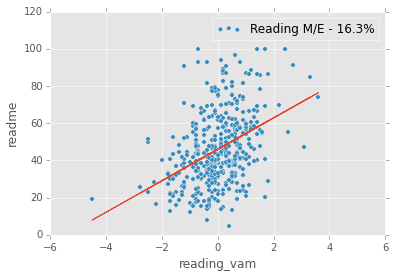

In [16]:
x = data['reading_vam']
y = data['readme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readme',label="Reading M/E - 16.3%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     57.64
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           1.84e-13
Time:                        22:08:45   Log-Likelihood:                -1759.1
No. Observations:                 451   AIC:                             3522.
Df Residuals:                     449   BIC:                             3531.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.9015      0.565     17.540      0.000         8.792    11.011
x              4.6248      0.609      7.592      0.000         3.428     5.822
==============================================================================
Omnibus:                      286.968   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2619.133
Skew:                           2.697   Prob(JB):                         0.00
Kurtosis:                      13.501   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

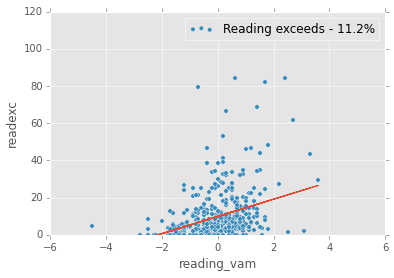

In [17]:
x = data['reading_vam']
y = data['readexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readexc',label="Reading exceeds - 11.2%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     44.22
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           8.54e-11
Time:                        22:10:23   Log-Likelihood:                -1733.0
No. Observations:                 451   AIC:                             3470.
Df Residuals:                     449   BIC:                             3478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.0784      0.533     67.728      0.000        35.032    37.125
x              3.8227      0.575      6.650      0.000         2.693     4.952
==============================================================================
Omnibus:                        2.760   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                2.518
Skew:                           0.158   Prob(JB):                        0.284
Kurtosis:                       3.186   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

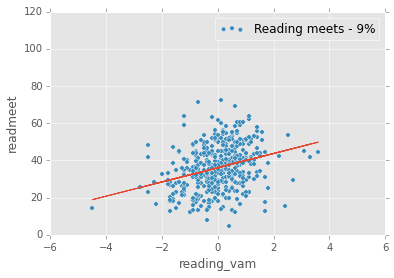

In [18]:
x = data['reading_vam']
y = data['readmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readmeet',label="Reading meets - 9%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     76.32
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           4.81e-17
Time:                        22:11:38   Log-Likelihood:                -1820.6
No. Observations:                 451   AIC:                             3645.
Df Residuals:                     449   BIC:                             3654.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     43.8767      0.647     67.819      0.000        42.605    45.148
x             -6.0994      0.698     -8.736      0.000        -7.471    -4.727
==============================================================================
Omnibus:                       31.420   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.015
Skew:                          -0.662   Prob(JB):                     1.51e-08
Kurtosis:                       3.407   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

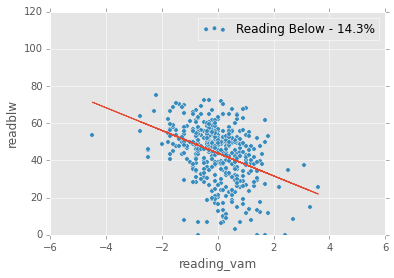

In [19]:
x = data['reading_vam']
y = data['readblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readblw',label="Reading Below - 14.3%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     41.43
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           3.14e-10
Time:                        22:12:59   Log-Likelihood:                -1529.0
No. Observations:                 451   AIC:                             3062.
Df Residuals:                     449   BIC:                             3070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.1397      0.339     29.923      0.000         9.474    10.806
x             -2.3537      0.366     -6.437      0.000        -3.072    -1.635
==============================================================================
Omnibus:                       67.374   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.631
Skew:                           0.940   Prob(JB):                     1.15e-23
Kurtosis:                       4.445   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

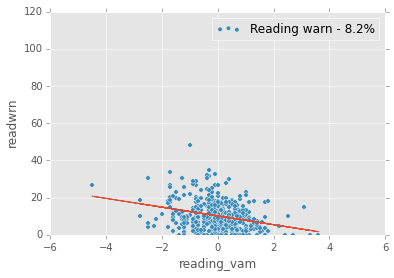

In [20]:
x = data['reading_vam']
y = data['readwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readwrn',label="Reading warn - 8.2%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     82.06
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           4.09e-18
Time:                        22:00:47   Log-Likelihood:                -1957.8
No. Observations:                 451   AIC:                             3920.
Df Residuals:                     449   BIC:                             3928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     50.9808      0.877     58.143      0.000        49.258    52.704
x              8.1315      0.898      9.058      0.000         6.367     9.896
==============================================================================
Omnibus:                        9.552   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.888
Skew:                           0.360   Prob(JB):                      0.00713
Kurtosis:                       2.917   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

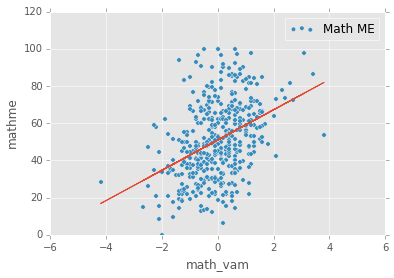

In [11]:
x = data['math_vam']
y = data['mathme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()
#print(lm.params.Intercept)
#print(lm.params.x)
#print(lm.params)

data.plot(kind='scatter', x='math_vam', y='mathme',label="Math ME")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     29.62
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           8.67e-08
Time:                        22:00:58   Log-Likelihood:                -1728.8
No. Observations:                 451   AIC:                             3462.
Df Residuals:                     449   BIC:                             3470.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.3188      0.528     15.764      0.000         7.282     9.356
x              2.9402      0.540      5.442      0.000         1.878     4.002
==============================================================================
Omnibus:                      321.813   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4186.443
Skew:                           2.992   Prob(JB):                         0.00
Kurtosis:                      16.674   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

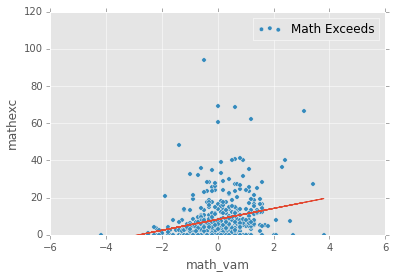

In [12]:
x = data['math_vam']
y = data['mathexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathexc',label="Math Exceeds")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     67.23
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           2.56e-15
Time:                        22:01:06   Log-Likelihood:                -1800.3
No. Observations:                 451   AIC:                             3605.
Df Residuals:                     449   BIC:                             3613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     42.6629      0.618     68.989      0.000        41.448    43.878
x              5.1911      0.633      8.199      0.000         3.947     6.435
==============================================================================
Omnibus:                        0.418   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.811   Jarque-Bera (JB):                0.524
Skew:                          -0.058   Prob(JB):                        0.770
Kurtosis:                       2.879   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

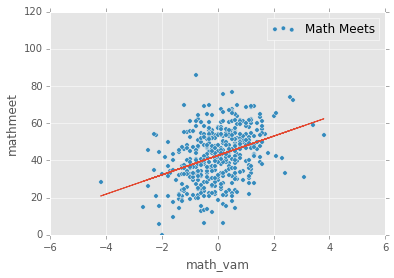

In [13]:
x = data['math_vam']
y = data['mathmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathmeet',label="Math Meets")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     65.07
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           6.64e-15
Time:                        22:01:15   Log-Likelihood:                -1833.2
No. Observations:                 451   AIC:                             3670.
Df Residuals:                     449   BIC:                             3679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.5902      0.665     59.519      0.000        38.283    40.897
x             -5.4933      0.681     -8.067      0.000        -6.832    -4.155
==============================================================================
Omnibus:                       19.144   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.600
Skew:                          -0.521   Prob(JB):                     3.36e-05
Kurtosis:                       3.098   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

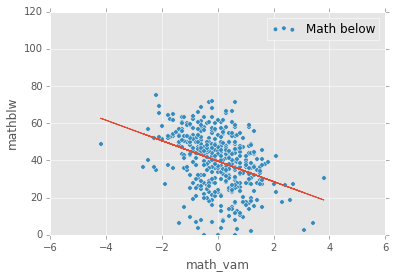

In [14]:
x = data['math_vam']
y = data['mathblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathblw',label="Math below")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     50.04
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           5.81e-12
Time:                        22:01:23   Log-Likelihood:                -1561.5
No. Observations:                 451   AIC:                             3127.
Df Residuals:                     449   BIC:                             3135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.4311      0.364     25.900      0.000         8.716    10.147
x             -2.6372      0.373     -7.074      0.000        -3.370    -1.905
==============================================================================
Omnibus:                      107.795   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.623
Skew:                           1.282   Prob(JB):                     1.24e-48
Kurtosis:                       5.274   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

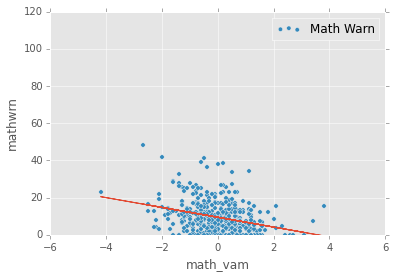

In [15]:
x = data['math_vam']
y = data['mathwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathwrn',label="Math Warn")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()